In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from umap import UMAP
%matplotlib inline

In [41]:
from os import listdir
from os.path import isfile, join
from pathlib import Path
from functools import reduce

In [42]:
potDoSpektrov = Path(r'D:\magistrska_spektri\normalized_spectra_R20000\T_03500')

In [124]:
i = 0
vrstice = 30
stolpci = 3000
posamezni_dfji = []
for file in listdir(potDoSpektrov):
    if i > stolpci:
        break
    else:
        #print(file)
      # posamezni_dfji.append(pd.read_csv(str(potDoSpektrov) + '\\' + file).head(vrstice))
        posamezni_dfji.append(pd.read_csv(str(potDoSpektrov) + '\\' + file))
        i = i + 1
    
#print(posamezni_dfji)   
df_zdruzeniSpektri = pd.concat(posamezni_dfji, axis=1).T
#print(dat1)

In [125]:
model = UMAP(n_neighbors = 15, min_dist = 0.25, n_components = 2, verbose = True, init='spectral', random_state=42)
umap = model.fit_transform(df_zdruzeniSpektri)

UMAP(min_dist=0.25, random_state=42, verbose=True)
Sun Jan 15 23:09:06 2023 Construct fuzzy simplicial set
Sun Jan 15 23:09:40 2023 Finding Nearest Neighbors
Sun Jan 15 23:09:40 2023 Finished Nearest Neighbor Search
Sun Jan 15 23:09:40 2023 Construct embedding



Sun Jan 15 23:09:44 2023 Finished embedding


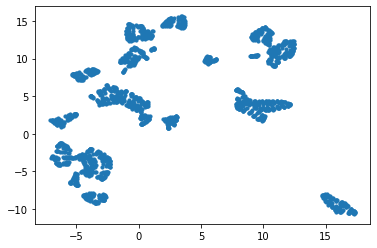

In [126]:
plt.scatter(umap[:, 0], umap[:, 1], cmap = 'tab10', s = 10)
plt.show()